https://www.kaggle.com/code/jeeraphongseasim/keras-cnn-dog-or-cat-classification-292197#Fit-Model

##loading data


In [2]:
#抓出玩遊戲的圖
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [ ]:
# #unzip train data
# !pip install zipfile
# import zipfile
# #解壓縮要放到哪個目錄
# url = '/content'
# # zipfile example
# def zip_list(file_path):
#   zf = zipfile.ZipFile(file_path, 'r')
#   zf.extractall(url)
 
# if __name__ == '__main__':
#   #壓縮檔位置
#   file_path = '/content/cnn.zip'
#   zip_list(file_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [3]:
pip install opencv-python

     |████████████████████████████████| 53.9 MB 11.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import os
import shutil
import warnings
import cv2
import io
from PIL import Image
warnings.filterwarnings("error",category=UserWarning)
base_dir="/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/test_CNN/0/"
i=0
def is_read_successfully(file):
  try:
    imgFile =Image.open(file)
    return True
  except Exception:
    return False
for parent, dirs, files in os.walk(base_dir):
  for file in files:
    if not is_read_successfully(os.path.join(parent, file)):
      print(os.path.join(parent, file))
      os.remove(os.path.join(parent, file))
      i=i+1
print(i)


0


In [28]:
y=os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/trian_CNN/0/')


In [30]:
#標記gaming=0
#source
y=os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/trian_CNN/0/')
g=len(y)
#from to
for i in range(0, g):
   os.rename(f'/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/trian_CNN/0/{y[i]}',f'/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/gaming_{i}.jpg')

In [32]:
#標記nogaming=1
#source
y=os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/test_CNN/1/')
g=len(y)
#from to
for i in range(0, g):
   os.rename(f'/Users/renjie/Desktop/實驗資料/cnn_picsorting/cnn 2/test_CNN/1/{y[i]}',f'/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/nogaming_{i}.jpg')

In [33]:
len(os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/'))

2562

In [34]:
len(os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/'))

2664

In [37]:
import os
from random import shuffle
from shutil import copyfile

label0=os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/')
label1=os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/')

shuffle(label0)
shuffle(label1)

# 0:2562=>513:513:1536
# 1:2664=>533:533:1598

train0=label0[:1536]
val0=label0[1536:513+1536]
test0=label0[513+1536:]
print(len(train0))

train1=label1[:1598]
val1=label1[1598:533+1598]
test1=label1[533+1598:]

print(len(train1))

1536
1598


In [38]:
for f in train0:   
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/train/'+ f)
for f in val0:
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/val/'+ f)
for f in test0:
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/gaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/test/'+ f)
for f in train1:
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/train/'+ f)
for f in val1:
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/val/'+ f)
for f in test1:
    copyfile('/Users/renjie/Desktop/實驗資料/cnn_picsorting/nogaming/'+f,'/Users/renjie/Desktop/實驗資料/cnn_picsorting/test/'+ f)


In [41]:
import os
get_files = len(os.listdir('/Users/renjie/Desktop/實驗資料/cnn_picsorting/train/'))
get_files

3134

## kaggle
https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification

In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
filenames = os.listdir("/Users/renjie/Desktop/實驗資料/cnn_picsorting/train/")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'gaming':
        categories.append(0)
    else:
        categories.append(1)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
train_df.head(5)

filename  category
0  nogaming_1006.jpg         1
1   nogaming_368.jpg         1
2  nogaming_2269.jpg         1
3     gaming_708.jpg         0
4   nogaming_354.jpg         1

In [5]:
filenames = os.listdir("/Users/renjie/Desktop/實驗資料/cnn_picsorting/val")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'gaming':
        categories.append(0)
    else:
        categories.append(1)

validate_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
filenames = os.listdir("/Users/renjie/Desktop/實驗資料/cnn_picsorting/test")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'gaming':
        categories.append(0)
    else:
        categories.append(1)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
validate_df.tail()

filename  category
1041    gaming_2013.jpg         0
1042   nogaming_359.jpg         1
1043    gaming_1283.jpg         0
1044  nogaming_2502.jpg         1
1045  nogaming_2264.jpg         1

<AxesSubplot:>

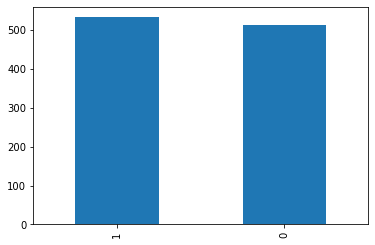

In [8]:
validate_df['category'].value_counts().plot.bar()

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

2023-05-07 22:59:02.879570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

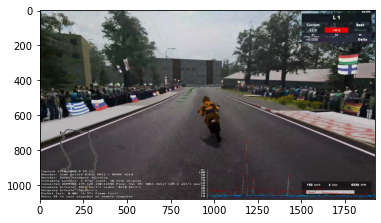

In [10]:
image = load_img("/Users/renjie/Desktop/實驗資料/cnn_picsorting/test/gaming_1023.jpg")
plt.imshow(image)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 64)    

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=10)

In [14]:
#We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# df_train.head()

In [16]:
train_df["category"] = train_df["category"].replace({0: 'gaming', 1: 'not gameing'}) 
validate_df["category"] = validate_df["category"].replace({0: 'gaming', 1: 'not gameing'}) 
# test_df["category"] = test_df["category"].replace({0: 'gaming', 1: 'not gameing'}) 

In [17]:
# train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [18]:
test_df.sample(5)

filename  category
883    gaming_2410.jpg         0
763     gaming_821.jpg         0
382  nogaming_2230.jpg         1
105    gaming_1313.jpg         0
264  nogaming_2034.jpg         1

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
total_test=test_df.shape[0]
batch_size=16
#batch_size=32

In [20]:
#Traning Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/Users/renjie/Desktop/實驗資料/cnn_picsorting/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 3134 validated image filenames belonging to 2 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/Users/renjie/Desktop/實驗資料/cnn_picsorting/val/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)


Found 1046 validated image filenames belonging to 2 classes.


In [22]:
print(validation_generator.class_indices)
print(validation_generator.n)
print(len(validation_generator))

{'gaming': 0, 'not gameing': 1}
1046
66


In [23]:
X_val, y_val = validation_generator.__next__()
print(X_val.shape, y_val.shape)

(16, 224, 224, 3) (16,)


In [24]:
X_list = []
y_list = []
for i in range(validation_generator.__len__()):
    X, y = validation_generator.__getitem__(i)
    X_list.append(X)
    y_list.append(y)

X_val = np.concatenate(X_list, axis=0)
y_val1 = np.concatenate(y_list, axis=0)
# y_val_argmax = np.argmax(y_val1, axis=0).astype('uint8')
# y_val_argmax=np.argmax(np.concatenate(y_list, axis=0), axis=-1).astype('uint8')

In [25]:
X_val.shape, y_val1.shape

((1046, 224, 224, 3), (1046,))

## See how our generator work

In [26]:
batch_size

16

## Fit model

In [27]:
import tensorflow as tf

In [28]:
model.reset_states()

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 64)    

In [30]:
epochs=5 
history = model.fit(
        train_generator, 
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=total_validate//batch_size,
        steps_per_epoch=total_train//batch_size,
        callbacks=callbacks
  )

Epoch 1/5
195/195 [==============================] - 241s 1s/step - loss: 0.1267 - accuracy: 0.9689 - val_loss: 2.2093 - val_accuracy: 0.5269 - lr: 0.0010
Epoch 2/5
195/195 [==============================] - 234s 1s/step - loss: 0.0833 - accuracy: 0.9779 - val_loss: 0.0850 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 3/5
195/195 [==============================] - 251s 1s/step - loss: 0.0812 - accuracy: 0.9740 - val_loss: 0.0648 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 4/5
195/195 [==============================] - 253s 1s/step - loss: 0.0653 - accuracy: 0.9801 - val_loss: 0.1013 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 5/5
195/195 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9820
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
195/195 [==============================] - 243s 1s/step - loss: 0.0638 - accuracy: 0.9820 - val_loss: 0.1607 - val_accuracy: 0.9577 - lr: 0.0010


In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12),dpi=800,)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [46]:
model.save("0507model.h5")

## predict

In [1]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras

In [2]:
# from tensorflow import keras
# model = keras.models.load_model('/content/0330model2.h5')

In [32]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/renjie/Desktop/實驗資料/cnn_picsorting/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1046 validated image filenames.


In [33]:
test_df["category"] = test_df["category"].replace({'gaming':0 ,'not gameing':1 }) 
test_df.head(5)
test_val = test_df["category"].values
test_val

array([1, 1, 0, ..., 1, 0, 1])

In [34]:
preds = model.predict(test_generator, 
                                  steps=total_validate//batch_size + 1,
                                  verbose=1)

66/66 [==============================] - 41s 621ms/step


In [35]:
pred=preds.reshape(1046)
test_val= test_val.reshape(1046)
test_val.shape

(1046,)

In [36]:
pred[0:3]

array([0.9999979 , 0.99999976, 0.00772225], dtype=float32)

In [37]:
threshold=0.4
pred = pred >= threshold
pred4 = pred.astype(int)
pred4

array([1, 1, 0, ..., 1, 0, 1])

In [38]:
threshold=0.5
pred = pred >= threshold
pred5 = pred.astype(int)
pred5

array([1, 1, 0, ..., 1, 0, 1])

In [39]:
threshold=0.7
pred = pred >= threshold
pred7 = pred.astype(int)
pred7

array([1, 1, 0, ..., 1, 0, 1])

In [40]:
threshold=0.8
pred = pred >= threshold
pred8 = pred.astype(int)
pred8

array([1, 1, 0, ..., 1, 0, 1])

In [41]:
threshold=0.9
pred = pred >= threshold
pred9 = pred.astype(int)
pred9

array([1, 1, 0, ..., 1, 0, 1])

In [42]:
test_val[:10],pred9[:10]

(array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1]), array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1]))

In [43]:
from sklearn.metrics import classification_report
target_names = ['gaming', 'nogaming']
y_true = test_val
y_pred = pred9
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      gaming       0.99      0.91      0.95       513
    nogaming       0.92      0.99      0.96       533

    accuracy                           0.95      1046
   macro avg       0.96      0.95      0.95      1046
weighted avg       0.96      0.95      0.95      1046



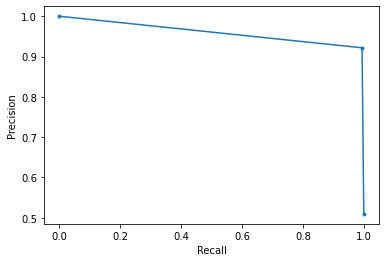

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


y_true = test_val
y_scores = pred9

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

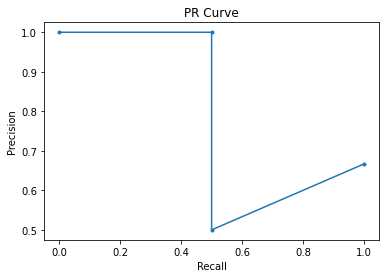

In [230]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_true = test_val
y_scores = pred4

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.plot(recall, precision,marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.show()

<AxesSubplot:>

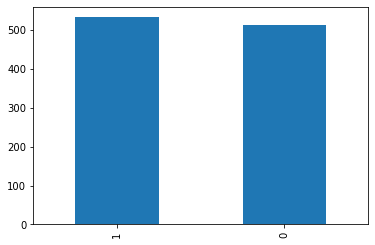

In [47]:
test_df['category'].value_counts().plot.bar()

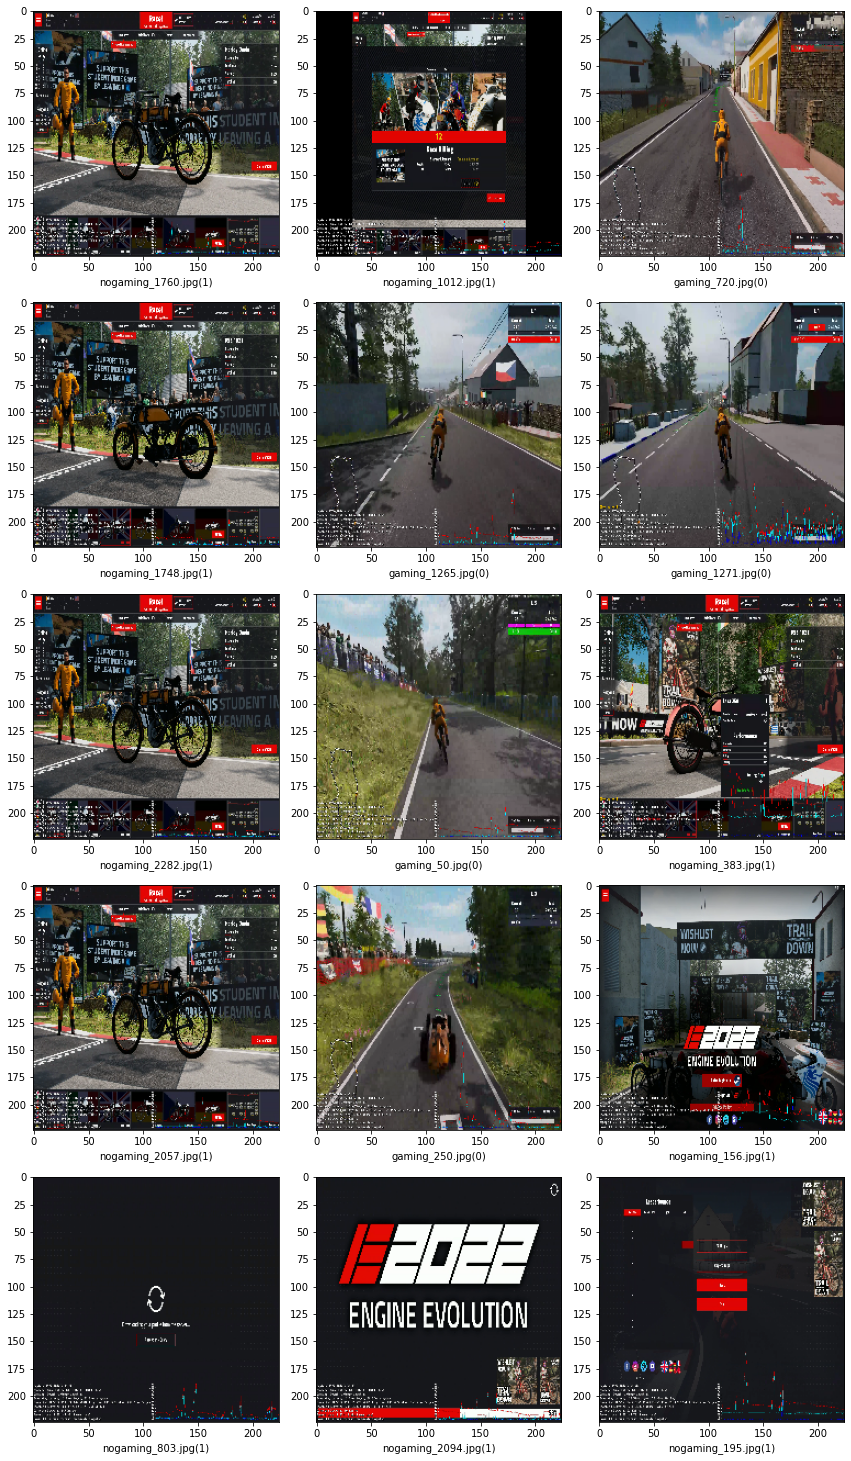

In [48]:
sample_test = test_df.head(15)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/Users/renjie/Desktop/實驗資料/cnn_picsorting/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()


## predict other vm

In [ ]:
import os
import shutil
import warnings
import cv2
import io
from PIL import Image
warnings.filterwarnings("error",category=UserWarning)
base_dir="/content/test_vm1"
i=0
def is_read_successfully(file):
  try:
    imgFile =Image.open(file)
    return True
  except Exception:
    return False
for parent, dirs, files in os.walk(base_dir):
  for file in files:
    if not is_read_successfully(os.path.join(parent, file)):
      print(os.path.join(parent, file))
      os.remove(os.path.join(parent, file))
      i=i+1
print(i)

/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_05-56-19_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-42-28_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-16-22_07-49-57_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-43-38_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-42-48_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-07-22_07-50-57_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-42-58_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-43-48_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-14-22_07-43-08_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-16-22_07-50-07_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_11-07-22_07-50-37_Screenshot.png
/content/test_vm2/Engine_Evolution_2022_(1871990)_10-22-22_13-46-58_Screenshot.png
/con

In [ ]:
#修改圖片格式
import os,sys
folder = '/content/test_vm1'
for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.jpg', '')
       output = os.rename(infilename, newname)

In [ ]:
import os
#source
y=os.listdir('/content/test_vm1')
g=len(y)
#from to
for i in range(0, g):
   os.rename(f'/content/test_vm1/{y[i]}',f'/content/test_vm2/{y[i]}.jpg')

In [ ]:
test_filenames = os.listdir("/content/test_vm2")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

filename
0  Engine_Evolution_2022_(1871990)_11-09-22_09-43...
1  Engine_Evolution_2022_(1871990)_10-18-22_06-52...
2  Engine_Evolution_2022_(1871990)_11-09-22_09-29...
3  Engine_Evolution_2022_(1871990)_11-06-22_03-30...
4  Engine_Evolution_2022_(1871990)_11-07-22_08-44...

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/test_vm2/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 5226 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size),
                                 verbose=1)


349/349 [==============================] - 493s 1s/step


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
# test_df['category'] = test_df['category'].replace({ 'nogaming': 1, 'gaming': 0 })

<AxesSubplot:>

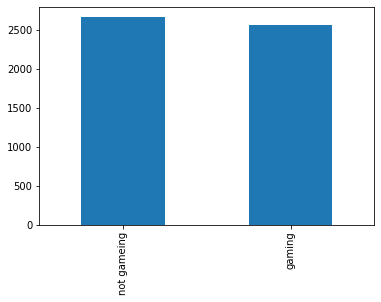

In [ ]:
test_df['category'].value_counts().plot.bar()

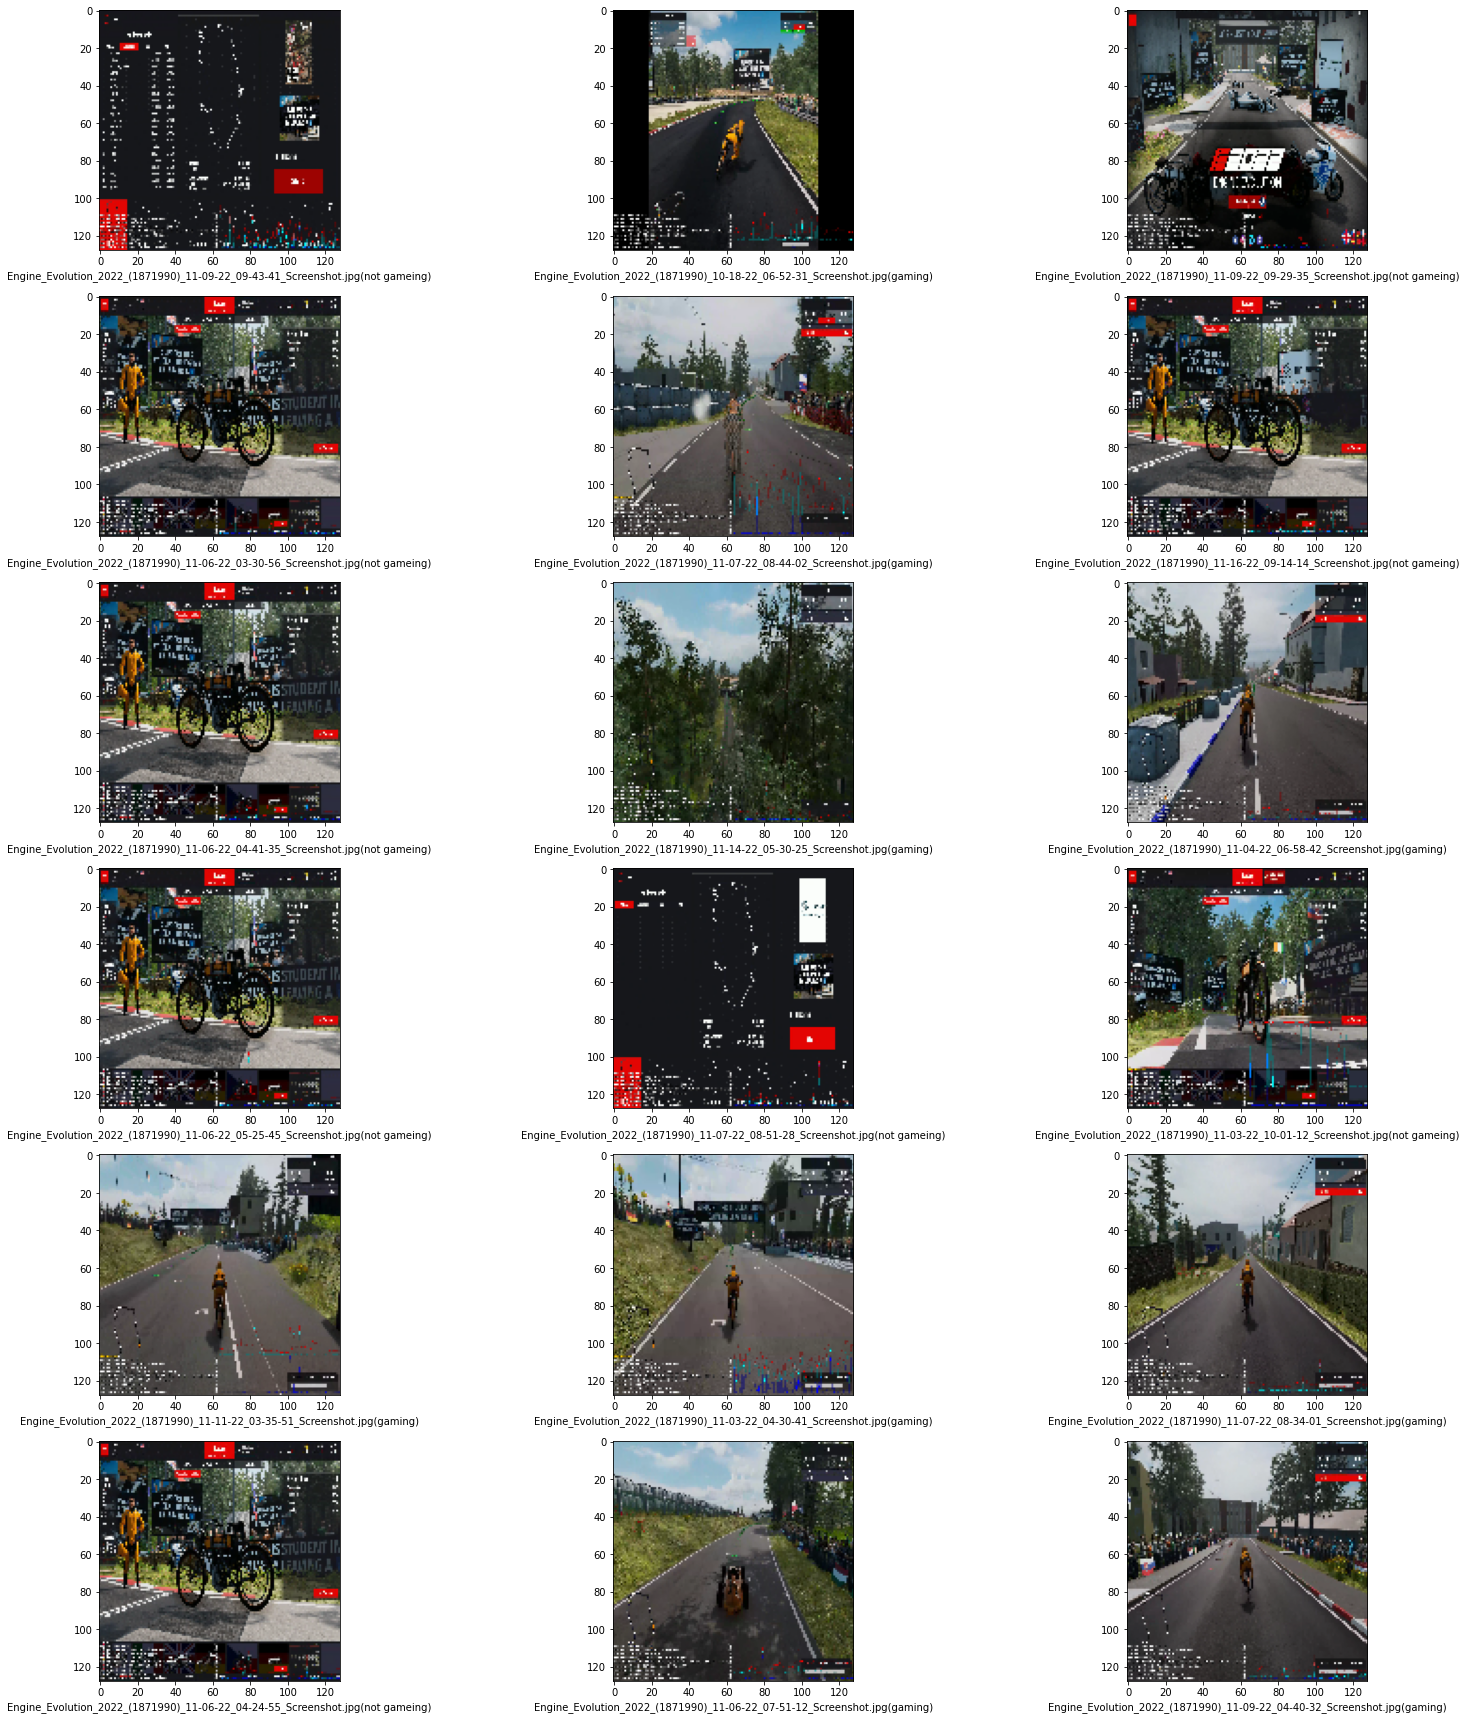

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(24, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/test_vm2/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
sample_test 

filename     category
0   Engine_Evolution_2022_(1871990)_11-09-22_09-43...  not gameing
1   Engine_Evolution_2022_(1871990)_10-18-22_06-52...       gaming
2   Engine_Evolution_2022_(1871990)_11-09-22_09-29...  not gameing
3   Engine_Evolution_2022_(1871990)_11-06-22_03-30...  not gameing
4   Engine_Evolution_2022_(1871990)_11-07-22_08-44...       gaming
5   Engine_Evolution_2022_(1871990)_11-16-22_09-14...  not gameing
6   Engine_Evolution_2022_(1871990)_11-06-22_04-41...  not gameing
7   Engine_Evolution_2022_(1871990)_11-14-22_05-30...       gaming
8   Engine_Evolution_2022_(1871990)_11-04-22_06-58...       gaming
9   Engine_Evolution_2022_(1871990)_11-06-22_05-25...  not gameing
10  Engine_Evolution_2022_(1871990)_11-07-22_08-51...  not gameing
11  Engine_Evolution_2022_(1871990)_11-03-22_10-01...  not gameing
12  Engine_Evolution_2022_(1871990)_11-11-22_03-35...       gaming
13  Engine_Evolution_2022_(1871990)_11-03-22_04-30...       gaming
14  Engine_Evolution_2022_(1871990)_11-07-22_08-34...       gaming
15  Engine_Evolution_2022_(1871990)_11-06-22_04-24...  not gameing
16  Engine_Evolution_2022_(1871990)_11-06-22_07-51...       gaming
17  Engine_Evolution_2022_(1871990)_11-09-22_04-40...       gaming

## load model

In [ ]:
#圖檔放在資料夾中（來源：目的）
# !gsutil -m cp -r gs://qoestorage/vm1/CNN_training/converted_keras.zip ./
# !gsutil -m cp -r gs://qoestorage/vm1/CNN_training/gaming.zip ./
# !gsutil -m cp -r gs://qoestorage/vm1/CNN_training/not_gaming.zip ./
!gsutil -m cp -r gs://qoestorage/vm4/vm4_png.zip ./


Copying gs://qoestorage/vm4/vm4_png.zip...
==> NOTE: You are downloading one or more large file(s), which would            
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

- [1/1 files][ 14.5 GiB/ 14.5 GiB] 100% Done 101.1 MiB/s ETA 00:00:00           
Operation completed over 1 objects/14.5 GiB.                                     


In [ ]:
!mkdir ./seat4

In [ ]:
#unzip train data
!pip install zipfile
import os
import zipfile
#解壓縮要放到哪個目錄
url = '/content'
# zipfile example
def zip_list(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall(url)
 
if __name__ == '__main__':
  #壓縮檔位置
  file_path = '/content/not_gaming.zip'
  zip_list(file_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
#unzip train data
!pip install zipfile
import os
import zipfile
#解壓縮要放到哪個目錄
url = '/content/seat4'
# zipfile example
def zip_list(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall(url)
 
if __name__ == '__main__':
  #壓縮檔位置
  file_path = '/content/vm4_png.zip'
  zip_list(file_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

filepath='/content/keras_model.h5'
model = load_model(filepath)

In [ ]:
#跑單一一個檔
img = image.load_img("/content/seat4/Engine_Evolution_2022_(1871990)_11-01-22_03-14-16_Screenshot.png",target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

classes

1/1 [==============================] - 2s 2s/step


array([[5.8175946e-08, 1.0000000e+00]], dtype=float32)

In [ ]:
#read all pic 
import os
df_total = pd.DataFrame()
count = 0
z = os.listdir(r"/content/seat4")
for i in z:
  try:
    img = image.load_img(f"/content/seat4/{i}",target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    img_data = preprocess_input(x)
    classes = model.predict(img_data) 
    max = np.max(classes[0])
    max_index = np.where(classes == max)
    print(f"{i}-finished")
    temp_dict = {"file":i,"max":max,"max_index":max_index[1],"0":classes[0][0],"1":classes[0][1]}
    df_temp = pd.DataFrame(temp_dict,index = [0])
    df_total = df_total.append(df_temp)
  
  except:
    print(f"error with the file-{i}")
    pass

1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-50-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-49-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-34-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-28-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-36_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-01-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-42-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-25-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-01_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-41-30_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-32-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-55-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-02-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-24-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-24_Screenshot.png-finished
1/1 [==============================] - 0s 77ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-21-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-03-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-43-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-50-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-33_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-38-34_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-10-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-37-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-50-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-09-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-57-26_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-13-36_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-27-06_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-35-35_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-22-26_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-29-09_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-06-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-47-36_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-17-54_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-40-07_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-21-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-20-53_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-52-51_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-53_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-30-25_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-10_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-58-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-55_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-21_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-56-15_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-06_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-01_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-00-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-06_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-34_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-42-16_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-56_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-53-12_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-14_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-54-14_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-30-05_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-18-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-24-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-41-51_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-40-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-32-23_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-41-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-02_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-27-21_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-03-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-01-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-16_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-22-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-55-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-35-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-47-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-29-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-44_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-30-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-28-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-40-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-33-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-36-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-49-33_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-43-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-11-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-01-16_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-30-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-54-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-06-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-55-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-58-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-13-24_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-14-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-35-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-41-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-23-26_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-57-44_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-16-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-58-13_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-36_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-22-04_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-25_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-55-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-36_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-36-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-54-37_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-26-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-32-11_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-49-46_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-54_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-54-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-52-55_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-03-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-56_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-53-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-44_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-31-45_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-49-51_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-10-52_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-02-06_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-49-55_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-26_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-52-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-41-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-32-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-54-21_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-41_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-45-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-41_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-49-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-44-04_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-55-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-37-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-07-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-37-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-15_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-41-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-43_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-13-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-45_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-38-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-30-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-48-56_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-41-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-42-51_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-32-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-29-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-35-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-52_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-44-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-51-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-05_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_08-59-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-30-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-04-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-39-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-02-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-09-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-45-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-26-04_Screenshot.png-finished
1/1 [==============================] - 0s 75ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-30-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-49-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-32_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_09-04-05_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-58-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-03-05_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-36-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-49-12_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-20-44_Screenshot.png-finished
error with the file-Engine_Evolution_2022_(1871990)_11-14-22_05-35-16_Screenshot.png
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-52-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-26_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-27-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-16_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-46-06_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-51-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-55_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-25-35_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-19-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-24-22_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-19-35_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-18-05_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-46-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-10_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-39-16_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-34-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-24_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-41-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-41_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-44_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-27-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-44_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-43-52_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-22-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-48-36_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-42-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-10_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-30-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-25-22_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-11_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-38-53_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-32_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-42-06_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-26-02_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-00-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-55-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-47-23_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-34-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-06_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-01-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-55-54_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-01-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-53-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-13_Screenshot.png-finished
error with the file-Engine_Evolution_2022_(1871990)_11-07-22_08-49-13_Screenshot.png


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-15-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-05-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-13-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-15_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-41-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-34-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-08-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-54_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-05_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-55-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-22-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-19-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-04-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-59-44_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-51-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-56-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-19-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-09-55_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-51-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-43-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-39-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-50-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-16_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-37-10_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-44-24_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-29-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-41-03_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-28-14_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-24_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-58-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-48-44_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-53-54_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-04-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-56_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-05_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-06_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-21-50_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-44-16_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-46_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_07-05-01_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-07-31_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-04-21_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-32-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-55-31_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-46_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-17-36_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-47-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-46_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-56-16_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-48-21_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-35-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-06-09_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-56_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-35-03_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-52-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-56_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-49-05_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-28-44_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-56_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-13-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-21-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-56-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-07-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-48-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-20_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-32-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-52-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-48-03_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-33-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-50-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-45-22_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-13-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-48_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-49-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-28-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-13-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-26-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-44-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-02-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-24-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-30-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-45-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-44-52_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-22-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-17-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-35-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-54_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-36-01_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-41-00_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-59-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-16_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-24-13_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-03_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-41-55_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-59-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-40-16_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-24-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-00_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-41-40_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-42-56_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-48_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-59-41_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-09-13_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-49-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-35-54_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-06-11_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-38-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-34_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-32-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-06_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-44-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-07-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-15_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-18-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-56_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-36_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-01_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-26-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-01-11_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-34-14_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-48-03_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-26-24_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-13_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-53-23_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-20-26_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-35-44_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-49-44_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-57-31_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-54-46_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-17-52_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-21-56_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-04-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-07-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-46-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-57_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-12-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-31-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-08-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-55-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-33-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-53-21_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-55-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-53-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-34_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-27-02_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-16-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-32-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-51-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-32-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-35-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-38-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-53-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-38-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-50-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-16-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-21-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-57-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-44-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-45-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-46_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-29-31_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-36_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-30-56_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-28-04_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-14_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-04-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-52-33_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-22-03_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-55-55_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-40-45_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-13-25_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-35-33_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-58-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-10-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-02-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-36_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-18-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-06-15_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-40-24_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-05-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-52_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-48-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-34_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-27-14_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-31_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-07-33_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-06_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-35-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-21_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-55_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-36-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-34-11_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-26-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-03_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-20-13_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-22-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-27-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-38-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-56-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-26_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_05-00-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-45-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-44_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_05-00-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-56-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-41-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-40-32_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-49-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-21-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-19-12_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-55-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-09-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-35-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-59-34_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-48-44_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-34-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-27-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-27-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-44-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-44-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-00-16_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-41-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-56-15_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-32-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-23-05_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-45-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-56_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-40-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-14_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-55-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-37-23_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-33-45_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-24-19_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-17-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-40-54_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-51-55_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-42-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-01_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-23-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-58-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-33-09_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-57-56_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-25_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-16-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-36_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-24-44_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-20-46_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-00-06_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-36_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-44_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-00-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-23-35_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-58-06_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-36-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-52_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-19-14_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-51_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-33-05_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-06_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-43-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-32_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-54_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-23-13_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-07-26_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-18-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-47-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-21-26_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-30-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-51-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-29-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-01-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 225ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-31-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-38-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-39-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-09-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-41-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-59-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-30-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-30-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-16-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-02-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-33-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-43_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-51-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-53_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-20-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-06_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-34-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-34-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-46-34_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-49-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-16_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-55-42_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-13-35_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-21-44_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-27-12_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-08-35_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-52-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-39-44_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-02-16_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-23-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-29-34_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_09-20-46_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-42-31_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-27-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-48-40_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-19-45_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-57-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-56_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-43-57_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-24_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-38-44_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-41-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-54_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-46-36_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-26-54_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-52-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-16-55_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-52-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-28-02_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-22-44_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-46-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-38-20_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-03-56_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-38-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-36_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-47-15_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-55-55_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-07-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-39-43_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-21-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-41-36_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-42-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-16-53_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-07-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-24_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-41-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-44-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-41-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-55-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-29-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-01_Screenshot.png-finished
1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-06-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-54-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-47-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-52-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-35-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-20-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-20-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-07-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-47-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-49-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-38-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-23-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-46-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-25-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-26_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-27-36_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-34_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-20-34_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-48-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-56_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-30-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-27_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-19-26_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-09-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-19-06_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-15-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-34-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-03_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-58-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-35_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-39-01_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-38-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-32-17_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-27-03_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-48-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-16_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-05-44_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-39-26_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-26-56_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-01-56_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-54-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-02-13_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-59-36_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-16_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-56_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-46-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-16_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-20-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-15-46_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-42-42_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-31_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-27-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-48-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-20-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-21-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-18-55_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-10_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-22-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-07-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-41-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-10-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-31-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-12-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-36_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-21-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-10-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-01-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-06-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-11-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-50-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-37-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-16-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-07-53_Screenshot.png-finished
1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-39-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-56_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-41-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-44_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-26_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-33-32_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-41-26_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-48-14_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-21-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-18-45_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-31-25_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-39_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-34-23_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-31-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-02-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-44-51_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-45-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-56-33_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-16_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-00-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-49-04_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_10-15-35_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-27-45_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-44_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-13-44_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-44-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-36_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-04-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-46-24_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-27-14_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-29-45_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-36-06_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-08-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-33-25_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-07-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-16_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-35_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-47-06_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_10-11-57_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-46-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-50-33_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-26-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-34-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-22-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-07-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-48-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-45-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-18-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-54-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-22-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-54-04_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-57-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-35-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-27-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-03-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-22_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-44-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-47-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-04-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-28-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-27-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-49-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-47-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-38-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-35-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-47-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-35-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-06_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-24_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-24-46_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-13-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-36_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-34_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-42-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-36-26_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-53-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-59-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-43-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-07-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-43-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-42-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-20-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-51-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-47-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-05-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-54-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-46-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-06-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-48-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-55-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-09-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-41-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-50-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-56_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-43-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-28-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-41-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-20-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-08-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-50-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-14-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-47-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-18-55_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-54-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-53-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-20-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-43-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-44-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-42-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-41-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-27-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-47-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-12-16_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-01-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-44-28_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-50-55_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-48-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-22-06_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-16_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-30-24_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-22-35_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-14-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 168ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-12_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-01-14_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-34-25_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-26_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-20-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-50_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-28-36_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-04-40_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-14_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-31-05_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-17-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-41_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-46_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-37-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-55_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-42-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-06_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-30-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-47-02_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-08-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-57_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-50_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-49-15_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-53-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-04-24_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-11_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-43-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-26-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-13-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-43_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-33-02_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-23-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-43-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-42-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-35-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-42-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-33-53_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-50-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-58-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-44_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-48-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-26-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-31-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 171ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 266ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 292ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-21-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 307ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-32-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 273ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-07-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 229ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 238ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-32-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 159ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-51-45_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-11-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-36-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-35-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-50-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 205ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 144ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-02-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-00-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-44-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 171ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-10-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-06-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-59-26_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-59-04_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-29-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-22-13_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-54_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-35-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-26_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-09-55_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-21-25_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-48_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-52_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-55-25_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-22-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-29-24_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-04_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-43-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-06_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-15-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-30-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-20-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-49-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-49-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-29-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-35-04_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-35-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-08-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-23-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-29-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-55-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-09-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-44-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-32-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-06-54_Screenshot.png-finished
1/1 [==============================] - 0s 72ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-55-01_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-23-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-04-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-43-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-57_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-55-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-57-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-23-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-22-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-46-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-39-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-43_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-39-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-24-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-34_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-18-51_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-22-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-36_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-27-24_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-30-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-37-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-22-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-36_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-33-33_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-47_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-34-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-11_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-33-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-56_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-13-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-20-16_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-27-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-00_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_09-13-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-59-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-19-35_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-55-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-31-56_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-42-43_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-38-07_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-53-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-31_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-20-36_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-07-02_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-06_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-58-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-42-41_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-55-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-04-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-21-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-47-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-10-16_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-02-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-08-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-24-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-23-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-38-36_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-46-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-22-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-43_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-45-29_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-29-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-28-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-41-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-40-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-42-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-43-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-33-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-29-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-56-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-06_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-53-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-44_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-06_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-12-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-15_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-58-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-24-43_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-12-48_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-40-53_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_07-02-02_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-41-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-56_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-33-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-38-27_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-39-14_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-44_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-26_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-14-53_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-44-45_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-30-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-34-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-36_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-36-51_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_09-10-36_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-51_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-52-26_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-31-23_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-13-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-56_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-06_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-54-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-15_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-15_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-40-33_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-26-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-55_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-26_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-42-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-00-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-35-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-52-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-14-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-44-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-06_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_07-39-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-21-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-32-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-20-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-42-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-11-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-35-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-45-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-49-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-20-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-03-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-31-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-32-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-48-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-58-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-29-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-20-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-20-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-23-51_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-42-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-38-24_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-22-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-55-57_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-17-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-36_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-16-34_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-44-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-42-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-26-24_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-43-32_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-52-32_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-07-46_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-25-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-55_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-20-16_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-55-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-31-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-37-43_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-36_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-42-02_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-48-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-36_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-32-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-56_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-03-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-43-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-02_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-34-53_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-22-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-12_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-24-26_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-33-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-51_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-26-44_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_09-09-36_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-44-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-46_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-45-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-38-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-05-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-47-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-48-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-58-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-50-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-35-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-39-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-27-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-04-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-41-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-26-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-04-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-49-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-21-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-31-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-43-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-48-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-17-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-21-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-18-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-34-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-35-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-54_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-27-34_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-44-56_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-46-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-20-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-15_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-48-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-54_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-05-22_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-51-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-00-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-55_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-00-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-44_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-57-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-39-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-17-16_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-33-27_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-58-21_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-19-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-43-51_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-46-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-06_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-37-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-37-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-58-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-34-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-24-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-22-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-58-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-03_Screenshot.png-finished
1/1 [==============================] - 0s 88ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-59-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-36-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-34-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-39-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-42-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-45-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-18-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-32-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-47-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-10-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-44-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-00-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-57-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-51-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-45-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-20-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-47-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-29-25_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-13-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-52_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-07-55_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-23-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-50-56_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-58-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-12-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-26-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-28-56_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-19-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-53_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-54-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-58-23_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-30-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-52_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-25-45_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-54-35_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-20-52_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-38-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-24-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-36_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-47-52_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-52-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-45-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-46_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-17-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-03-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-31-46_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-36-41_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-16_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-33-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-44-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-15_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-45-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-29-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-42-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-32-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-30-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-44_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-37-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-43-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-07-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-33-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-34-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-53-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-00-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-41-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-52-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-36-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-19-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-30-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-25_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-22-03_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-29-03_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-18-35_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-26-43_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-53-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-45_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-34-03_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-46-15_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_07-21-53_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-51-52_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_07-01-22_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-36-21_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-31-04_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-54_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-25-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-33-14_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-55-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-26_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-28-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-08-24_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-55-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-25_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-50-41_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-42-21_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-23-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-55-45_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-22-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-42-13_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-36-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-11-26_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-26_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-49-42_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-54-56_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-09-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-36_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-22-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-57-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-32-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-36_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_09-17-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-34_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-45-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-33-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-47-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-33-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-19-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-19-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-17-12_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-28-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-08-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-35-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-49-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-54-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-58-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-48-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-42-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-45-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-35-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-44-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-43-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-23-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-15_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-59-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-16-43_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-12-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-42-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-36-25_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-45-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-02-23_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-36-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-50-27_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-21-12_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-42-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-32_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-42-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-53-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-46-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-36_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-58-03_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-54-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-21-44_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-57-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-23-53_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-17-53_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-30-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-41_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-33_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-59-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-46_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-34-13_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-55-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-06_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-43-55_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-00-43_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_05-10-26_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-22-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-13-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-24-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-30-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-54-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-56-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-31-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-06-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-34-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-38-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-32-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-48-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-30-05_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-22-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-16-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-30-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-55-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-31-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-56-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-19-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-36-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-52-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-08-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-49-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-23-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-26-06_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-38-25_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-20-46_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-16-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-55-34_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-29-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-17-44_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-08-24_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-28-55_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-52-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-36_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-44_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-53-21_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-49-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-56_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-31-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-35-43_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-31-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-38-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-43-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-41-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-26_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-51-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-42-02_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-44-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-45-46_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-35-34_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-06-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-28-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-24_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-06_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-55-12_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-12-36_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-55-05_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-35-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-01-36_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-26_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-51-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-30-15_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-18-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-51-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-52-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-40-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-55_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-45-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-16-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-05-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-55-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-32-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-39-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-49-48_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-54-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-49-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-00-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-29-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-58-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-43-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-56-13_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-07-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-54-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-52-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-19-03_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-31-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-57-26_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-46-25_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-29-43_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-56_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-27-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-44_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-06-16_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-06_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-57-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-38-02_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_07-24-24_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-34_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-51_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-18-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-16_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-38-43_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-43-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-33-31_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-05-25_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-33-09_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-56-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-06_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-47-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-37-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-18-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-39-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-19-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-40-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-44-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-01-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-34-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-52-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-51-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-48-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-34-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-56-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-21-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 157ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 190ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-41-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-07-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-03-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-13-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-20-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-42-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-26_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-48-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-26_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-15_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-05_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-15-15_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-29-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-09-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-55-33_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-26-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-26_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-57-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-08-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-45_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-35-30_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-53-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-16_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-55-16_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-18-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-56_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-55-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-05-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-27-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-38-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-42-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-30-42_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-31-06_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-56-54_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-51-13_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-24-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-21-22_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-49-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-02_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-46-15_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-36_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-56-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-44-05_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_07-20-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-55-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-43-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-19-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-34_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-24-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-13-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-46-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-38-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-54-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-37-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-44-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-24-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-38-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-35-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-28-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-44-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-45-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-43-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-12-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-42_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-25-22_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-38-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-01-26_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-41-46_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-39-13_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-25-53_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_04-06-36_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-34_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-35-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-23-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-57-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-18-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-21-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-55_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-40-15_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-39-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-43_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_05-01-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-54_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-31-20_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-10-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-26_Screenshot.png-finished
1/1 [==============================] - 0s 37ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-43-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-12-11_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-07-44_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-50-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-42-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-58-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-58-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-40-35_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-12-03_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-56-35_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-41-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-56_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-02-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-50-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-32-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-54-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-44-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-43-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-16-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 154ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-36-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 158ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-35-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-57-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-39-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-40-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-59-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-55-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-48-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-42_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-49-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-53-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-39-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-53-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-01-54_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-42-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-16_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-43-55_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-41-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-26_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-48-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-35_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-55-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-26-24_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-02_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-05_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-50-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-22-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-22_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-25-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-44_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-36_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-51-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-26_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-22-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-46_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-38-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-40-06_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-40-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-35_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-02-30_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-12-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-16_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-52-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-24-14_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-39-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-46-43_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-13-56_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-32-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-24-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-49-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-43-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-50-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-24-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-45-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-49-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-26-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 148ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-54-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-50-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-07-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-39-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-46-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-35-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-34-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-43-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-30-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-25-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-02-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 177ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-36-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-34-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-21-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-03_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-18-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-55-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-37-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-32-04_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-19-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-41-56_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-30-28_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-36-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-22-34_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_07-07-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-53-43_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-45-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-15_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-41-34_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-35-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-55-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-06-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-26_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-41-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-30_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-21-24_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-45-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-43-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-16-24_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-58-14_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-30-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-24_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-28-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-41-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-51-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-34-17_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-48-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-21-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-02-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-24-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-45-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-37-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-32-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-40-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-18-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-36-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-30-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-23-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-39-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 144ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-52-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-56-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-39-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-34-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-46_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-41-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-23-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-53-16_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-45-04_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-25-03_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-41-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-35-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-49-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-06_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_09-48-54_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-06-35_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-54-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-04_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-56_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-43-06_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-06-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-55_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-34-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 45ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-35-23_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-07-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-32-46_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-59-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-26_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-54-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-13-15_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-21-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-37-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-05-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-35-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-45-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-34-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-44-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-06-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-07-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-58-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-59-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-34-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-23-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-36-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-35-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-52-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-33-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-21-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-51-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-30-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-41-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-51-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-43-03_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-57-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-52-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-14-43_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-17-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-51-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-44-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-55_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-40-31_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-37-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-16-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-59-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-55-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-59-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-26_Screenshot.png-finished
1/1 [==============================] - 0s 38ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-47-54_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-15-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-39-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-46_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-40-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-58-47_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-33-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-05-46_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-05-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-14_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-22-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-01_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-22-04_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-22_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-50-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-21-01_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_07-29-05_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-36_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-31-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-19-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-46-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-40-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-58-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-59-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-47-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-44-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-22-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-24-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-48-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-17-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-23-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-47-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-12-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-17-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-49-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-44-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-10-56_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-24-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-07-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-36-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-23-33_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-48-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-07-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-00-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-33-04_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-23-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-51_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-44-34_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-47-25_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-46-23_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-46_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-48-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-07-36_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-14-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-26-34_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-01-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-57-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-53_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-10-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-08-21_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-32-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-17-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-21-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-34-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-39-52_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-51-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-32-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-44-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-40-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-45-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-34-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-30-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-52-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-17-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-52-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-42-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-56-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-47-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-24-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-27-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-57-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-23-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-50-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-18-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-01-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-11-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-21-04_Screenshot.png-finished
1/1 [==============================] - 0s 45ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-55-21_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-56-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-03-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 48ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-36_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-56-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-52-52_Screenshot.png-finished
1/1 [==============================] - 0s 50ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-19-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-06-25_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 51ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-12-54_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-34-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 43ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-26_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-48-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-22_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-55-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-16-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-58-02_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-54-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-27-25_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-37-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-28-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-16_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-44-36_Screenshot.png-finished
1/1 [==============================] - 0s 42ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-59-03_Screenshot.png-finished
1/1 [==============================] - 0s 46ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-01-04_Screenshot.png-finished
1/1 [==============================] - 0s 43ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-32-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-32-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-49-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-58-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-29-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-36-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-53-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-25-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-38-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-42-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-31-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-25-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-38-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-43-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-39-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-56-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-40-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-42-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-24_Screenshot.png-finished
error with the file-Engine_Evolution_2022_(1871990)_11-01-22_03-59-16_Screenshot.png


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-31-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-59-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-52-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-30-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-47-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-48-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-37-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-13-16_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-37-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-30-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-41-08_Screenshot.png-finished
1/1 [==============================] - 0s 41ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-56-15_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-08-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-36-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-39-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-06_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-46-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-04-33_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 50ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-39-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-03-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-11-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-49-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-43-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-20-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-30-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-20-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-34-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-42-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-31-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-32-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-06-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-18-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-57-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 148ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 146ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-36-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-09-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-16-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-18-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-50-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-56-05_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-53-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-25-11_Screenshot.png-finished
1/1 [==============================] - 0s 36ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-25-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-23-14_Screenshot.png-finished
1/1 [==============================] - 0s 36ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-07-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-06_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-51-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-33-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-39-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-02-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-50-32_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-23-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-55-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-36-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-55-06_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-35-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-28-46_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-43_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-44-20_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-59-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-13_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-42_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-04-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-26_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-06-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 39ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-54-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-24_Screenshot.png-finished
1/1 [==============================] - 0s 51ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-35-54_Screenshot.png-finished
1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-28-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-52-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-46-16_Screenshot.png-finished
1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-04-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-30_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-18-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-24-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-03-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-23-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-24-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-46-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-02-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-55-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-03-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-53-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-42-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-32-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-13-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-26-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-40-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-17-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-53-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 216ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-55-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-25-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-33-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-02-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-48-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-42-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-46-55_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-29-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-55-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-28-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-01-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-30-52_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-26-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-22-53_Screenshot.png-finished
1/1 [==============================] - 0s 39ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-15-50_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-55-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 54ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-33-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-15-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-35_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-37-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-04-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 47ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-51-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-46-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-16_Screenshot.png-finished
1/1 [==============================] - 0s 52ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-48-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-26_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-43-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-15_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 49ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-41-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-05_Screenshot.png-finished
1/1 [==============================] - 0s 44ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-45-12_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-37-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-42-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-23-43_Screenshot.png-finished
1/1 [==============================] - 0s 49ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-21-22_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-01-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-16_Screenshot.png-finished
1/1 [==============================] - 0s 47ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-55-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-41-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-48-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-37-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-36-11_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_06-20-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-50-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-41-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-46-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-51-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-42-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-33-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-24-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-55-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-26-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-24-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-49-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-30-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-54-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-20-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-33-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-22-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-52-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-55-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-19-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-56-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-15-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-30-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-48-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-34-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-41-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-40-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-35-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-05-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-41-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-02-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-37-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-21-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-31-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-55-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 163ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 160ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-05-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-26-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-17-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-45-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-59-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-54-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-40-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-07-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-37-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-09-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-32-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-01-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-20-16_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-43-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-15_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-35-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-32-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-53-44_Screenshot.png-finished
1/1 [==============================] - 0s 78ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_09-08-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-43-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-23-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-42-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-56-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-27-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-28-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-20-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-42-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-20-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-27-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-46-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-56-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-14-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-38-34_Screenshot.png-finished
1/1 [==============================] - 0s 48ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-50-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-13-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-32-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-14-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-34-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-37-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-48-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-41-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-09-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-33-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-46-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-23-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-30-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-59-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 156ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-21-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-33-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-43-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-43-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-44-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-52-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-42-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-59-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-20-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-32-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-53-11_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-48-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-39-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-23-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-34-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-47-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-39-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-12-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-31-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-33-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-07-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-30-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-33-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-47-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-34_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-31-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-41-25_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-20-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-14-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-53-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-06_Screenshot.png-finished
1/1 [==============================] - 0s 40ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_10-08-13_Screenshot.png-finished
1/1 [==============================] - 0s 53ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-19-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-53-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-23-55_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-52-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-37-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-33-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-43-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-44-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-56-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-59-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-46-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-28-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-27-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-35-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-23-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-15-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-30-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-26-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-53-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-40-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-14-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-09-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-42-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-20-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-21-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-47-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-55-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-48-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-36-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-19-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-19-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-31-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-50-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-34_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-42-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-40-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-58-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-30-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-38-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-40-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-13-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-10-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-53-54_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-52-41_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-31-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-54-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-02-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-22-23_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-00-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-08-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-43-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-57-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-42-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-18-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-15-43_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-46-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-05_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-13-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-41-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-41-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-35-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-47-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-07-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-34-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-53-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-24-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-17-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-52-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-54-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-29-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-13-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-13-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-30-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-51-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-07-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-30-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-52-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-28-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-16-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-52-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-06-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-01-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-58-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-56_Screenshot.png-finished
1/1 [==============================] - 0s 78ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-37-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-41-54_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-27-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-26_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-24-13_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-46-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-52-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-01-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-51-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-46_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-43-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-22-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-08-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-36-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-38-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-16_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-55-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-37-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-51-26_Screenshot.png-finished
1/1 [==============================] - 0s 81ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-42-22_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-10-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-42-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-14-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-48-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-46-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-25-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-38-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-57-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-03-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-46_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-21-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-48-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-48-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-22-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 361ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-54-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 208ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 232ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-42-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 271ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-50-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 277ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-20-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 293ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-56-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 176ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 436ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-25-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 274ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-25-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-59-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-14-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-27-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-22-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-33-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-43-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-24-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-49-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-01-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-55-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-16-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-04-16_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-38-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-08-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-10-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-26_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-27-23_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-22-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-41_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-31-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-53-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-05-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-02-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-35-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-22-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-26-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-46-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-12-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-29-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-01-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-58-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-35-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-17-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-29-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-59-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-07-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-24-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-49-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-45-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-50-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-06-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-46-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-14-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-56-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-30-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-09-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-35-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-12-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-47-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-13-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-27-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-23-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-05-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-51-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-45-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-57-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-44-53_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-49-33_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-22-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-42-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-40-25_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-07-01_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-53-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-59-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-08-33_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-22-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-29-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-27-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-37-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-51-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-44_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-59-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-31-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-46-02_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-01-20_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)



1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-36_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_04-33-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-39-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-44-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-21-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-30-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-39-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-58-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-37-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-24-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-28-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-34-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-29-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-36-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 141ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-27-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-53-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-50-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-37-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-09-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-20-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-51-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-36-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-59-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-17-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-21_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-36-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-46_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-43-50_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-49-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-53_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-55_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-55-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-12-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-51-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-34-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-57-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-43-46_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-39-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-33-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-15_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-34-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-45-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-34-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-01-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-53-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-46-43_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-42-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-57-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-12-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-30-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-37-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-33-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-46-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-51-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-41-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-23-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-48-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-49-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-49-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-35-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-59-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-25-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-02-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-03-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-38-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-55-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-13-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-35-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-37_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-40-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-48-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-16_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-37-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-39-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-06_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-47-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-14-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-46-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-08-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-25_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-26-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-23-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-33-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-54-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_11-22-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-59-02_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-43-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-47-43_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-10-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-30-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-22_Screenshot.png-finished
1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-46-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-42-53_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-23-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-55-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-27-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-27-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-58-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-45-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-55-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-54-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-35-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-37-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-41-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-35-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-12-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-07-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-51-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 150ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-42-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-23-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-10-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-03-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-29-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-13-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-29-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-17-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-37-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-59-06_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-41-37_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-14-04_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-15-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-55-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-15_Screenshot.png-finished
1/1 [==============================] - 0s 55ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-43-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-35-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-51-53_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-11_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-21-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-27-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-53_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_07-11-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-12-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-43_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-35-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-29-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-35-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-21-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-37-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-22-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-09-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-56-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-56-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-51-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-39-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-19-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-17-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-32-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-44-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-38-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-40-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 150ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-47-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 149ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-37-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-13-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-38-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-50-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 144ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-34-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-12-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-47-55_Screenshot.png-finished
1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-57-50_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-32-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-22-12_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-53-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-44-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-08-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-36_Screenshot.png-finished
1/1 [==============================] - 0s 77ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-33-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-35-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-35-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-07-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-30-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-19-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-44-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-49-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-22-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-24_Screenshot.png-finished
1/1 [==============================] - 0s 84ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-16-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-06-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-29-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-50-33_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-24-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-31-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-49-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-06-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-39-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-23-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-21-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-32-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-06-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-47-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-32-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-48-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-58-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-51-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 164ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 164ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-54-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 146ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-33-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-09-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-11-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 180ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-50-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 175ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-35-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-19-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-46-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-37-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-19-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-44-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-41-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-26-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-46-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-13-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-28-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 144ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-47-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-24-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-17-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-19-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-46-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-31-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-58-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-33-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-35-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-55-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-19-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 157ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-37-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-31-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-52-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-58-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-56-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-22-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-42_Screenshot.png-finished
1/1 [==============================] - 0s 79ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-53-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-44-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-54-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-14-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-07-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-35-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-37-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-18-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-08-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-28-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-44-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-30-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-55-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-33-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-43-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-37-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-24-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-52-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-49-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-09-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-40-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-27-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-19-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-41-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-37-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-51-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-20-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-23-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-06_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-57-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-26-06_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-06-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-37-53_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-34-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-24-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-56_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-52-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-55-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-20-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-01-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-46_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-27-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-47-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-30-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-59-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-57-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-36_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-46-31_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-34-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-46_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-30-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-01-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-45-44_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-53-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-22-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-05_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-30-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-18-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-32_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-42-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-31-24_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-48-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-51-35_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-52-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-30-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-49-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-25-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-45_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-12-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-34_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-27-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-57-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-55-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-54-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-48-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-39-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-22-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-47-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-27-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-21-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-47-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-21-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-35-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-18-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-01-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-40-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-42-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-35-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-41-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-49-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-32-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-48-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-50-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-23-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-32-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-06-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-35-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-22-23_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_08-44-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-42_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-24-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-45-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-44-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-44-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-08-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-52-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-11-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-19-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-46_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-44-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-42-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-02_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-56-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-38-46_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-28-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-24-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-36-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-28-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-40-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-37-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-50-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-41-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-32-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-27-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-47-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-21-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-01-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-40-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-51-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-22-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-37-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-03-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-45-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-27-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-33-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-33-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-38-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-41-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-30-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-48-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-30-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-43-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-06-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-20-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-32-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-20-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 146ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-18-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-17-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-26_Screenshot.png-finished
1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-22_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-53-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-02-46_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-22-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-18-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-47-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-28-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-43-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-06_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-38-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-55-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-01-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-00-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-39-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-06-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-04-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-56-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-36-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-23-34_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-03-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-59-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-16-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-26_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-45-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-45-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-09-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-54-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-29-54_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-31-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-06_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-51-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-56-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-57-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-35-26_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-30-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-36_Screenshot.png-finished
1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-44-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-38-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-54_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-05-20_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-46-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-39-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-18-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-07-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-27-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-00-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-17-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-35-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-44-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-34-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-48-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-37-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 145ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-21-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-56-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-24-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-44-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-17-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-28-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 146ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-50-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-44-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-51-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-41-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-03-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-13_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-21-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-27-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-43-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-05_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_09-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-27-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-33-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-16-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-15-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-38-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-47-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-09-04_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-30-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-37-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-31-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-58-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-47-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-15-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-46-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-41-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-36_Screenshot.png-finished
1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-39-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-57-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-52-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-43-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-27-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-48-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-54-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-58-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-28-09_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-38-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-11-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-08-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-08-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-18-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-21-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-20-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-53-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-51-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-52-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-33-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-01-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-42-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-04-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 153ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-49-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-39-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-08_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-49-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-49-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-49-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-02-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-47-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-32-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-49-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-34-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-52-26_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-35-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-23_Screenshot.png-finished
1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-05-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-35-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-22_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-36-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-49-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-25-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-36-51_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-23-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-21_Screenshot.png-finished
1/1 [==============================] - 0s 72ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-30-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-52-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-47-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-33-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-33_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_01-52-52_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_06-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-25-04_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-48-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-59-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-32-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-17-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-07-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-41-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-45-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-30-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-18-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-35-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-22-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-49-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-33-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-50-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-21-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-47-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-17-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-15-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-54-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-34-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-39-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-59-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-36-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-24-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-26-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-58-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-45-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-04-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-18-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-40-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-49-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-36-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-17-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-26-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-37-53_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-48-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-30-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-15-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-40-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-04_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-50-41_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-57-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-20-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-51-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-22-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-12-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-17-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-33-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-31-56_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-24-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-07-55_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-32-52_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-38-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-09-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-45_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-05-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-02-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-29-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-13-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-38-24_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-56-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-51-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-44_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-47-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-54-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-20-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-30-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-37-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-47-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-58-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-55-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-44-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-09-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-52-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-31-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-44-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-03-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-28-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-48-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-41-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-08-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-27-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-18-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-41-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-41-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-34-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-59-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-30-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-34-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-46-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-58-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-31-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-42-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-21-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-46-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-24_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-31-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-32-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-44-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-57-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-59-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-42-15_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-43-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-34-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-28-14_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-34-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-31-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-31-15_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-01-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-16-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-52-06_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-38-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-19-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-30-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-05-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-17-06_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-42-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-27-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-48-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-06-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-31-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-04-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-21-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-45-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-36-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-50-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-26-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-23-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-03-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-30-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-47-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-48-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-01-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-25-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-46-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-11-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-51-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-48_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-26-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 178ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-54-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-39-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-37-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-10-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-43-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-29-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-35-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-21-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-37-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-24-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-52-03_Screenshot.png-finished
1/1 [==============================] - 0s 84ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_04-20-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-32-53_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-43-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-29-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-04-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-35-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-45-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-31-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-34-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-30-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-34-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-25-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-40-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-09-51_Screenshot.png-finished
1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-18-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-43-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-24-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-56-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-52-52_Screenshot.png-finished
1/1 [==============================] - 0s 75ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-34-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-41-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-48-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-24-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-02-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-29-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-22-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-49-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-05-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 111ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-56-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-30-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-49-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-48-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 160ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-00-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-16-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-05-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-47-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 162ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-38-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-49-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 152ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-17-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-41-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-07-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-25-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-52-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 148ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-02-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 150ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-27-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-31-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-47-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-24-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 156ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-46-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-58-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-26-36_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-54-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-18-14_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-35-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-21-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-49-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-29-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-17-34_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-35-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-51-46_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-53-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-41-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-48-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-52-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-34-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-25-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-04-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-37-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-35-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-39-03_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-30-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-20-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-52-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-36-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-53-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-09-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-34-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-44-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-33-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-36-56_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_03-41-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-47-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-29-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-32-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-06-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-44-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-01-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-50-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-40-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-55-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-50-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-30-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-38-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-24-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-34-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-56-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-42-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-50-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-11-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-03-47_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-10-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-11-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-57-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-49-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-27-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-20-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-46-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-04-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-42-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-58-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-17-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-33-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-51-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-09-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-01-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-21-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-53-07_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-35-16_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-33-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-58-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-19-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-06_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-36-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-22-06_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-31-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-58-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-46-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-57-56_Screenshot.png-finished
1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-46-04_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-27-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-43-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-29-55_Screenshot.png-finished
1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-29-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-09-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-31-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-55_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_05-50-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-32-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-16_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_07-59-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-27-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-43-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-46-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-33-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-10-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-58-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-42-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-58-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 129ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-18-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-42-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-53-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-32-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-29-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-51-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-48-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-33-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-17-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-04-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-23-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-12-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-42-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-57-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-07-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-37-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-24-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-32-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-33-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 132ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-57-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-19-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-29-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-35-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-30-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-38-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-05_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-52-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-07-06_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-02-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-27-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-37-57_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-02-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-50-41_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-45-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-46-26_Screenshot.png-finished
1/1 [==============================] - 0s 57ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-01-22_03-33-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-12-01_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-53-52_Screenshot.png-finished
1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-32-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-35-12_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-31_Screenshot.png-finished

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-44-05_Screenshot.png-finished
1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-46-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-43-28_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-04-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-58-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-23-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-42-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-30-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-40-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-47-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-46_Screenshot.png-finished
1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-40-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-20-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-22-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-18-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-30-59_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-40-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-22-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-44-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-51-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-31-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-42-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-35-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-04-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-26-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-59-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-15-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 102ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-48-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-31-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-06-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-29-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-26-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-25-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-18_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-30-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-05-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-22-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-54-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-29-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-38-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-56-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-50-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-36-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-28-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-05-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-43-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-19-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-24-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 163ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-10-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-16-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-58-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-45-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-50-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-11_Screenshot.png-finished
1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-33-25_Screenshot.png-finished
1/1 [==============================] - 0s 71ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_04-21-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-04-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-59-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-17-26_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-40-42_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-48-20_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-41-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-46-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-41-25_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-04-22_03-32-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-24-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-34-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-34-42_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-51-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-20-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-22-04_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-50-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-14-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-56-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-40-43_Screenshot.png-finished
1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-30-19_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-34-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-46_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-49_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_05-23-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-07-15_Screenshot.png-finished
1/1 [==============================] - 0s 56ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_05-53-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-56-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-28-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-17-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-42-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-36-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-45-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-40-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-12-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-17-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-20-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-58-36_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-29-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-48-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-25-06_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-30-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-26-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-27-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-49-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-37-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-46-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-23-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-08-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-50-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-13-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-01-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-29-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-58-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 137ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-18-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-29-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-29-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-24-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-15-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-00-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-30-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-47-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-19-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-00-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-49-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-04-11_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-39-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-18-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-26-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-26-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-22-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-28-16_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_03-01-11_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-07-22_08-43-09_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-28-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-58-16_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-03-22_03-42-52_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-50-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 57ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-07-14_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-26-29_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-52-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-48-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-26_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-45-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-44-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-48-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-57-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-37-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-03-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-41-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-18-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-34-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-49-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-07-51_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-56-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-18-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-06-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-48-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-59-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-40-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-53-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-15-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-31-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-16-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-01-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-49-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-49-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-08-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-54-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-13-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-29-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-52-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-01-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-05-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-10-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-25-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-17-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-24-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-31-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-50-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-38-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-37-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-45-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-33-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-20-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-22-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-01-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-20-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-33-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-22-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-39-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-07-22_09-00-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-33-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-47-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-58-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-25-32_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-24-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-47-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-37-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-08-22_09-06-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-10-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-26-03_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-47-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-35-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-18-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-27-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-11-22_05-01-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 82ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-13-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-22-06_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-42-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-18-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-19-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-10-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-36-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-22-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-36_Screenshot.png-finished
1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-26-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-35-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-35-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-22-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-43-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-04-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-35-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-07-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-25-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-33-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-52-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-38-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-42-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-48-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-37-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-28-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-25-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-06-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-37-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-05-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-20-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-46-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-51-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-50-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-32-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 92ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-21-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-57-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-13-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-04-22_07-07-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-38-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-53-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-15-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-57-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-53-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-58-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-00-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-57-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-16-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-55-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-15-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 104ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-14-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 135ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-39-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-09-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 138ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-52-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-17-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-44-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-21-39_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-00-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-28-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-36-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-21-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-54-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-55-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-22-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-30-02_Screenshot.png-finished
1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-25-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-58-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-30-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-27-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-41-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-34-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-22-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-05-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-11-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-16-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-52-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-23-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-56-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-52-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-37-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-44-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-59-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 77ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-52-33_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-31-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-40-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-42-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-07-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-34_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_06-34-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-20-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-50-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-32-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-29-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-26-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-03-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-24-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-59-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 116ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-33-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-14-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-52-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-33-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-25-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-49-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-39-27_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-51-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-25-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-18-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-21-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-31-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-19-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 103ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-25-38_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-29-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-39-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 119ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-43-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 106ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-45-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-31-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 72ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-01-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-28-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-07-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 120ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-37-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 128ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-59-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-22-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-23-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-48-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 130ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-55-35_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 142ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-12-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-55-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 127ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-21-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-53-49_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-02-22_09-54-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-16-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-36-40_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-23-17_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-39-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-25-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-47-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-54-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-16-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-45-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-55-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-16-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-13-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-39-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-31-03_Screenshot.png-finished
1/1 [==============================] - 0s 60ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_03-27-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-42-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-43-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-52-56_Screenshot.png-finished
1/1 [==============================] - 0s 64ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_02-35-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-51-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-48-58_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-33-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-21-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-43-02_Screenshot.png-finished
1/1 [==============================] - 0s 67ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-11-22_04-25-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-46-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-53-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-38-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-26-02_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-39-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-54-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-18-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-09-24_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-31-00_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-54-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-54-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-31-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 126ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-28-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-59-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 67ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-50-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-12-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-53-11_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-41-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 117ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-53-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-24-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 124ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-43-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-17-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-36-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-06-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-18-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-23_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-16-37_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 136ms/step
Engine_Evolution_2022_(1871990)_11-02-22_10-05-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-07-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 134ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-14-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-27-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-11-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 125ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-43-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 140ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-33-49_Screenshot.png-finished
error with the file-Engine_Evolution_2022_(1871990)_11-01-22_04-02-56_Screenshot.png


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 91ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-19-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-50-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-40-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-32-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-35-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-52-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 108ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 144ms/step
Engine_Evolution_2022_(1871990)_11-09-22_10-06-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 78ms/step
Engine_Evolution_2022_(1871990)_11-08-22_08-35-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-58-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 110ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-15-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 121ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-19-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-20-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 96ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-31-44_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-35-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-38-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-31-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-31-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-18-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 58ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-54-27_Screenshot.png-finished
1/1 [==============================] - 0s 62ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-02-22_09-59-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-31-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 64ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-24-55_Screenshot.png-finished
1/1 [==============================] - 0s 96ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-14-22_07-52-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-15-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-26-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-08-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-43-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 100ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-15-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-44-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-46-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-11-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-59-15_Screenshot.png-finished
1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-23-08_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-39-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-34-30_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-55-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-40-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-16-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-14-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 80ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-11-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-43-13_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 88ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-56-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-54-43_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-18-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-57-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-15-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 90ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-58-36_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-14-22_06-36-11_Screenshot.png-finished
1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-01-22_08-59-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 114ms/step
Engine_Evolution_2022_(1871990)_11-07-22_08-41-24_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 112ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-21-32_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 150ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-21-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 123ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-21-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-32-05_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 143ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-15-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-52-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-57-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 105ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-29-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-52-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-03-22_03-14-22_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 145ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-33-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-40-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 167ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-43-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-05-33_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 147ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-40-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 85ms/step
Engine_Evolution_2022_(1871990)_11-11-22_01-38-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 118ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-39-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 182ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-40-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 95ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-41-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 115ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-06-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 107ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-29-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 162ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-18-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 149ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-56-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 145ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-31-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 98ms/step
Engine_Evolution_2022_(1871990)_11-04-22_06-36-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 94ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-30-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 131ms/step
Engine_Evolution_2022_(1871990)_11-16-22_06-26-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 83ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-27-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 139ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-54-56_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 113ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-23-34_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 149ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-38-14_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 101ms/step
Engine_Evolution_2022_(1871990)_11-03-22_10-15-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 109ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-07-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 122ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-31-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 99ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-36-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 158ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-22-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-26-54_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 133ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-25-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 81ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-55-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 84ms/step
Engine_Evolution_2022_(1871990)_11-06-22_07-49-04_Screenshot.png-finished
1/1 [==============================] - 0s 78ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-08-22_08-55-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-14-22_03-49-55_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-52-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_03-19-25_Screenshot.png-finished
1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-28-41_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-11-22_03-41-21_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 89ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-48-25_Screenshot.png-finished
1/1 [==============================] - 0s 86ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-09-22_09-33-31_Screenshot.png-finished
1/1 [==============================] - 0s 63ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-40-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-31-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_05-40-16_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-04-22_03-19-03_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 73ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-51-25_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-45-26_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-46-04_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-14-22_07-38-06_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-16-22_07-58-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-26-33_Screenshot.png-finished
1/1 [==============================] - 0s 66ms/step


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


Engine_Evolution_2022_(1871990)_11-06-22_06-43-41_Screenshot.png-finished
1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-28-57_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 66ms/step
Engine_Evolution_2022_(1871990)_11-16-22_07-46-51_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 65ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-56-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 69ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-19-46_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 86ms/step
Engine_Evolution_2022_(1871990)_11-06-22_06-44-53_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-09-15_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-03-22_09-01-06_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-11-22_04-58-45_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-09-22_04-40-44_Screenshot.png-finished
1/1 [==============================] - ETA: 0s

<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 71ms/step
Engine_Evolution_2022_(1871990)_11-09-22_05-21-12_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 87ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-37-24_Screenshot.png-finished
1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_09-01-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 61ms/step
Engine_Evolution_2022_(1871990)_11-16-22_09-10-15_Screenshot.png-finished
1/1 [==============================] - 0s 70ms/step
Engine_Evolution_2022_(1871990)_11-03-22_08-47-31_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 62ms/step
Engine_Evolution_2022_(1871990)_11-16-22_05-56-44_Screenshot.png-finished
1/1 [==============================] - 0s 59ms/step
Engine_Evolution_2022_(1871990)_11-14-22_05-53-01_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)
<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 79ms/step
Engine_Evolution_2022_(1871990)_11-09-22_09-35-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 76ms/step
Engine_Evolution_2022_(1871990)_11-01-22_04-02-52_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-03-22_04-39-42_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 75ms/step
Engine_Evolution_2022_(1871990)_11-06-22_04-29-36_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 93ms/step
Engine_Evolution_2022_(1871990)_11-07-22_07-57-02_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 74ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-33-50_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 97ms/step
Engine_Evolution_2022_(1871990)_11-01-22_03-50-10_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


1/1 [==============================] - 0s 68ms/step
Engine_Evolution_2022_(1871990)_11-06-22_02-44-23_Screenshot.png-finished


<ipython-input-19-642efd33d194>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_temp)


In [ ]:
df_total

NameError: ignored

## 信效度分析
Cronbach’ α 的標準為0.7以上
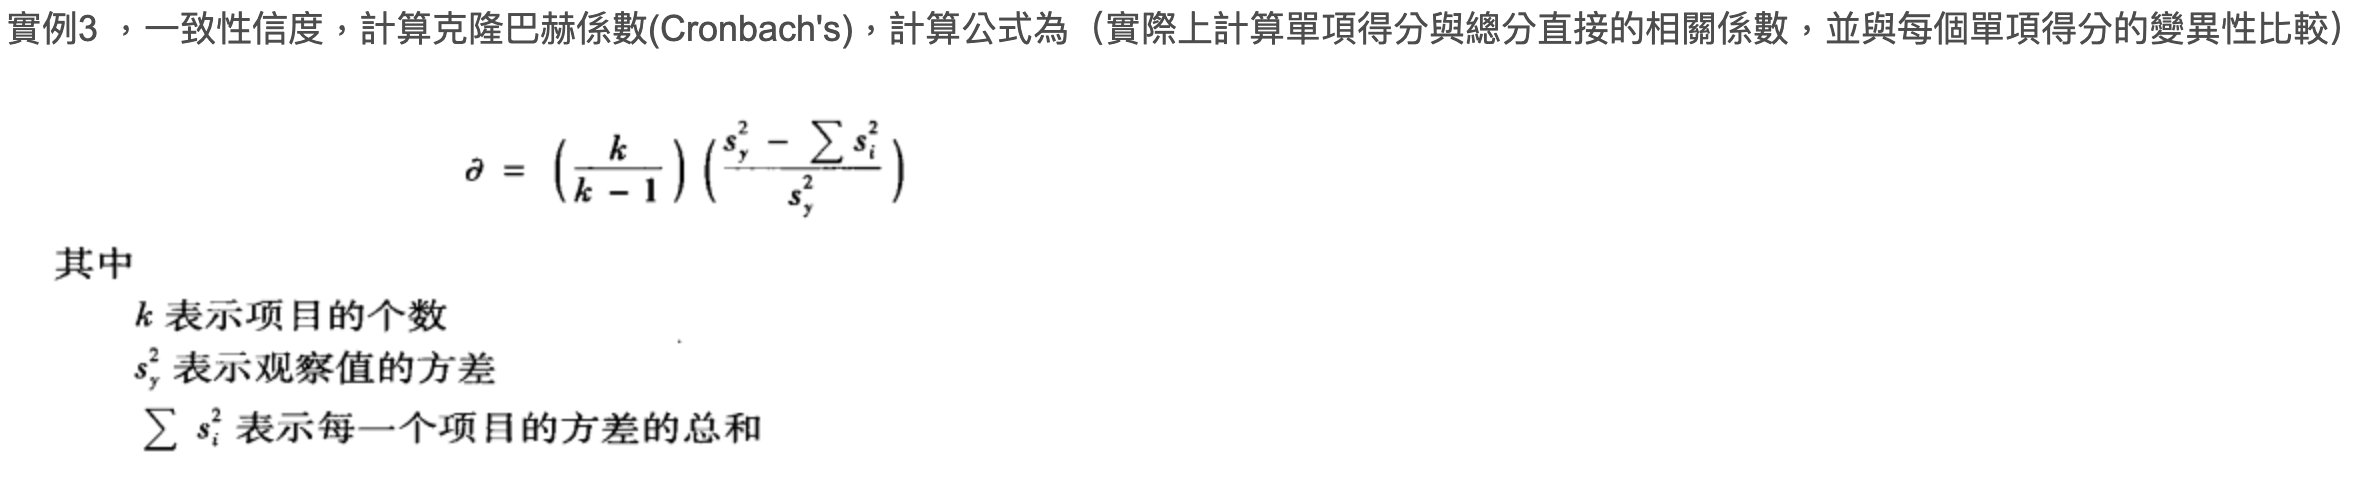

# 信度分析

In [ ]:
#信度分析
import numpy as np
import pandas as pd 
import scipy.stats.stats as stats
import math
backmos = pd.read_csv('/content/expand_mos.csv')


In [ ]:
a=backmos.iloc[:,6:10]

In [ ]:
total_row = a.sum(axis=1)
sy = total_row.var()
var_column = a.var()
si =var_column.sum()
r =(4/3)*((sy-si)/sy)
r

0.8655694199903033

In [ ]:
backmos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1030 non-null   int64 
 1   time            1030 non-null   object
 2   position        1030 non-null   int64 
 3   username        1030 non-null   object
 4   round           1030 non-null   int64 
 5   Status          1030 non-null   object
 6   Graphic         1030 non-null   int64 
 7   Interactive     1030 non-null   int64 
 8   SelfAssessment  1030 non-null   int64 
 9   Opinion         1030 non-null   int64 
 10  latency         1030 non-null   int64 
 11  packet_loss     1030 non-null   int64 
 12  bandwidth       1030 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 104.7+ KB


In [ ]:
mos=backmos.iloc[:,6:10]
temp_spss=mos.corr()
temp_spss


Graphic  Interactive  SelfAssessment   Opinion
Graphic         1.000000     0.657651        0.411504  0.702121
Interactive     0.657651     1.000000        0.517011  0.804242
SelfAssessment  0.411504     0.517011        1.000000  0.604319
Opinion         0.702121     0.804242        0.604319  1.000000

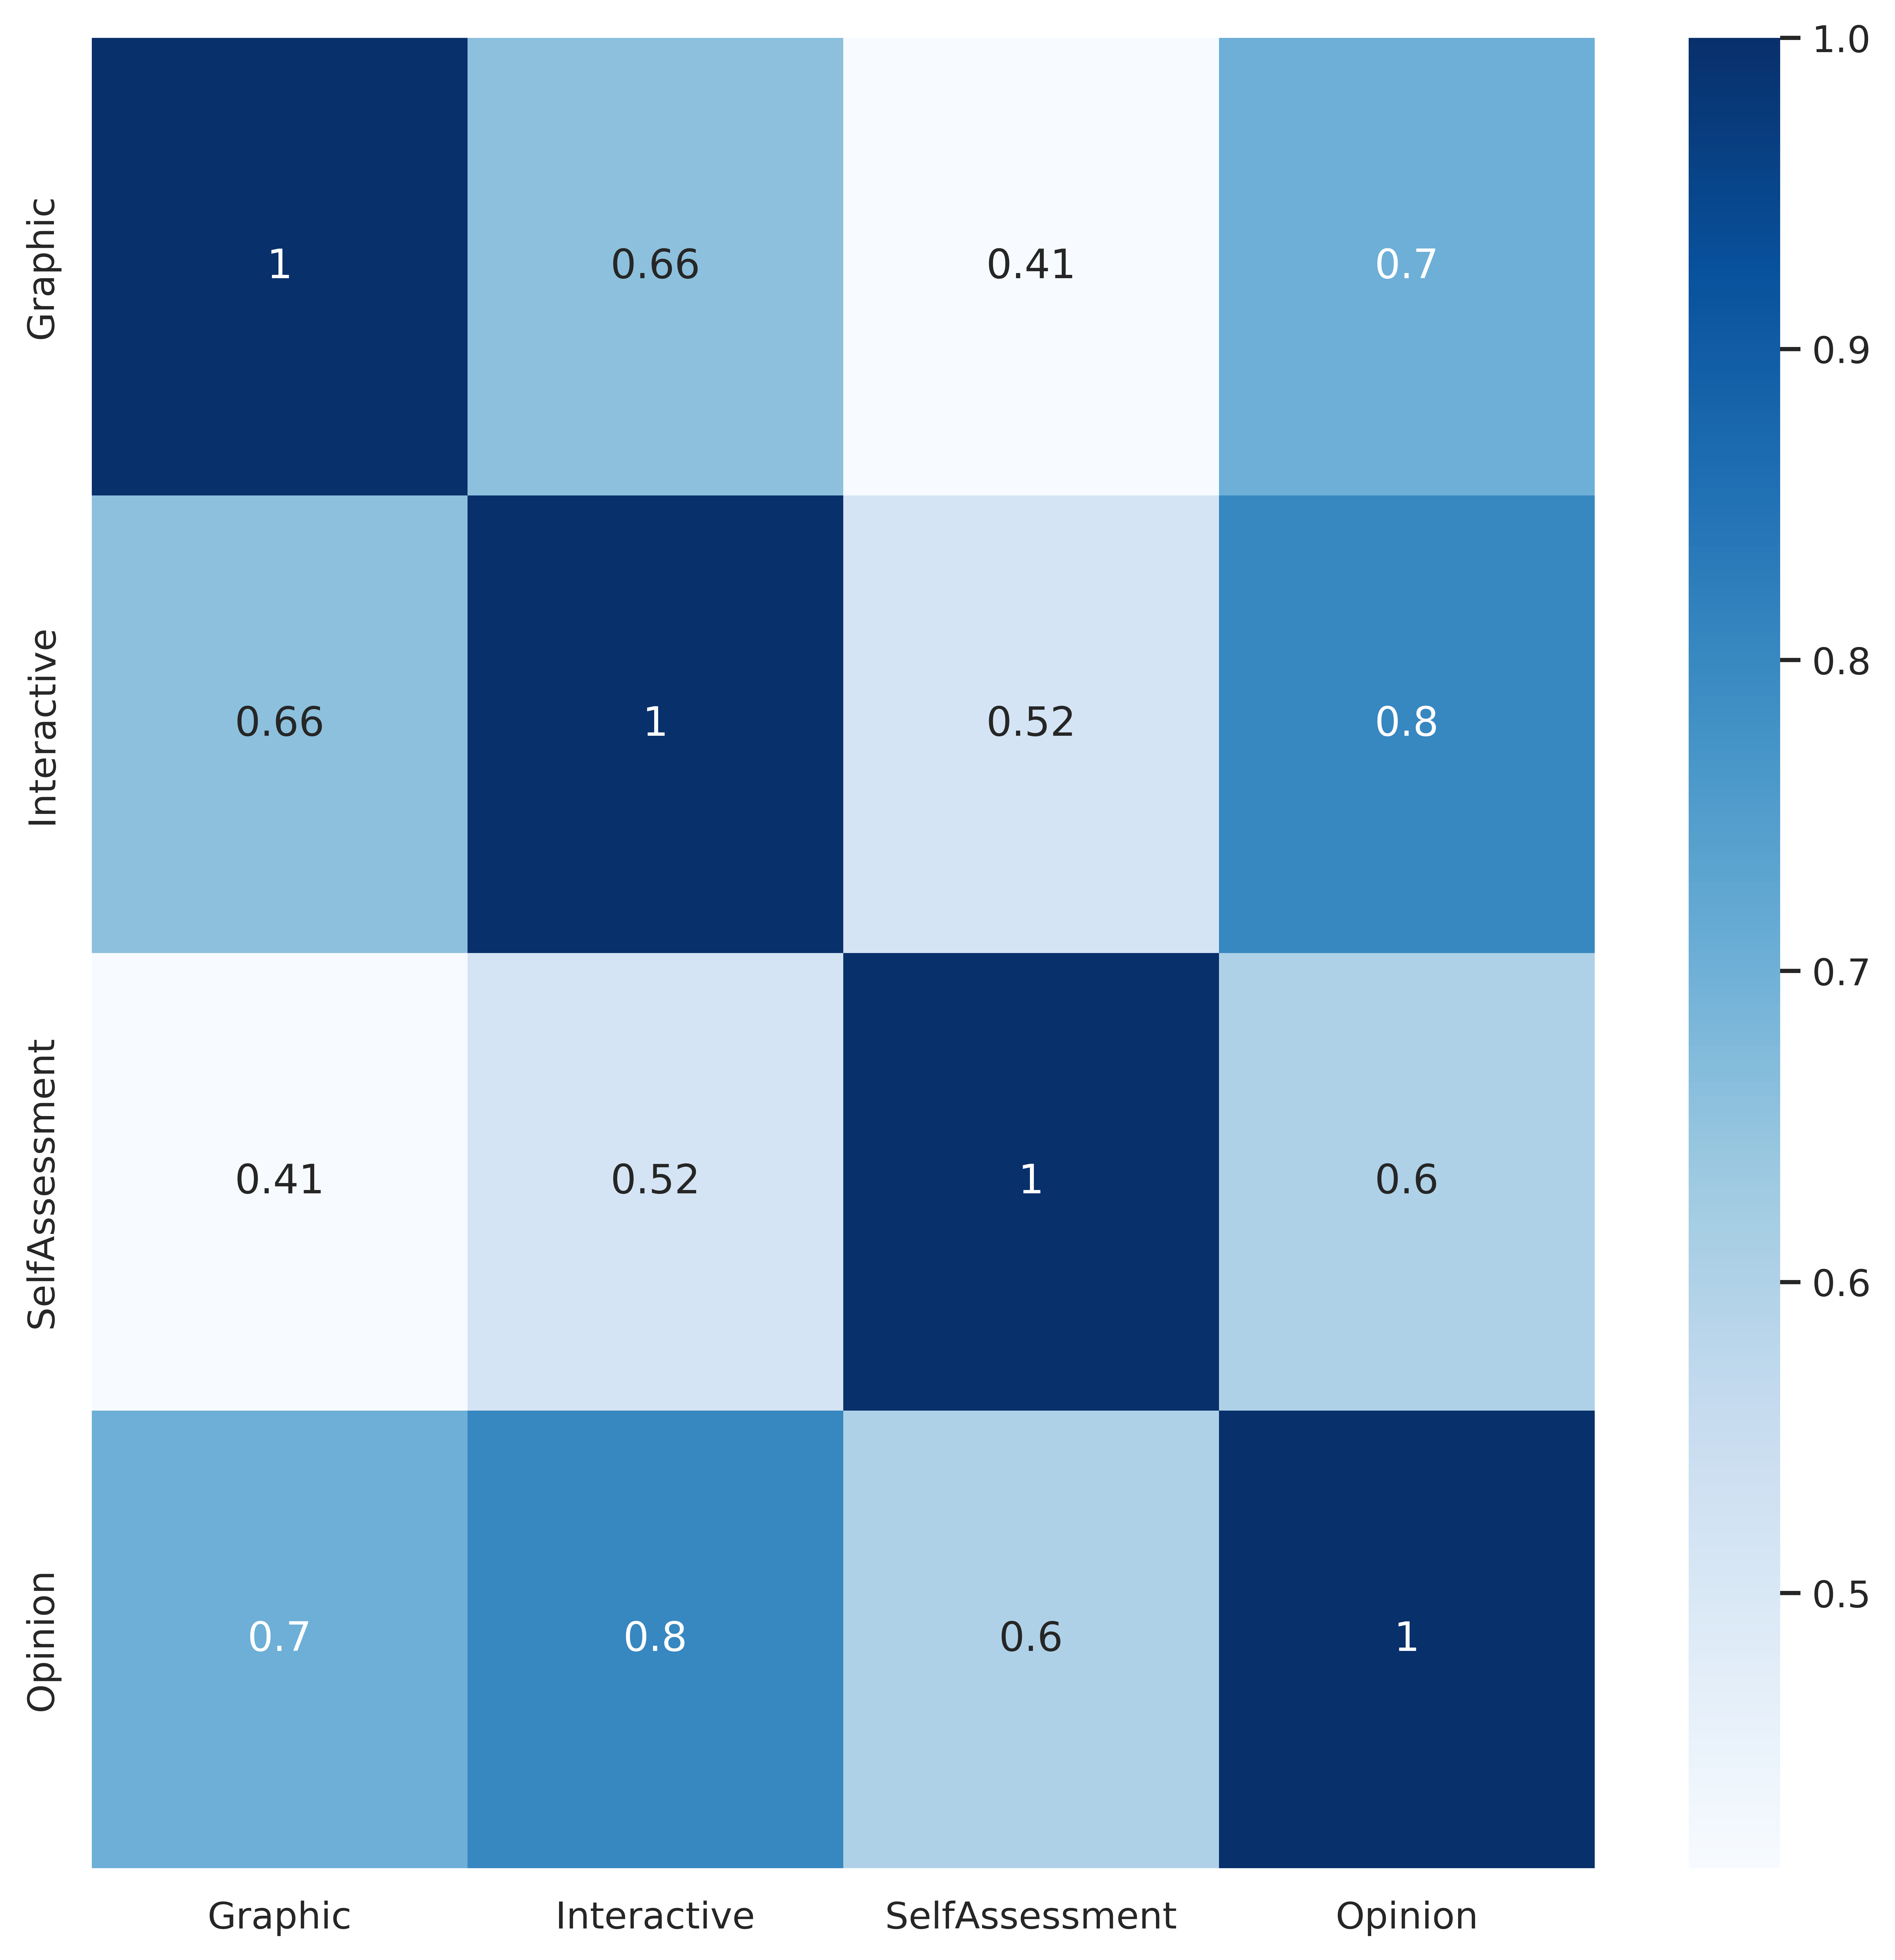

In [ ]:
#spss計算相關係數
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10,10),dpi=800) #設置長寬尺吋大小
sns.set(context="notebook",style="whitegrid",palette="dark")
c1 = sns.heatmap(temp_spss, annot = True, vmax = 1, cmap="Blues")

# plt.subplots(figsize=(10,10)) #設置長寬尺吋大小
# plt.figure(dpi=100)


In [ ]:
from scipy.stats import pearsonr

# 计算两个变量之间的 Pearson 相关系数
corr, p = pearsonr(backmos['Graphic'], backmos['Interactive'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p)


Pearson correlation coefficient: 0.6576513025281231
p-value: 1.299230686324636e-128
